# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#loading the data
df = pd.read_csv('/content/drive/My Drive/abtest/used_device_data.csv')
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


## Data Overview

- Observations
- Sanity checks

In [4]:
# view the first 5 rows of the dataset
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


- The dataset displays information about differet brands of phones.
- Some descriptions seems to be missing.

In [5]:
# view the last 5 rows of the dataset
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [6]:
# view the shape of the dataset
df.shape

(3454, 15)

Observations : There are 15 columns and 3454 rows.

In [7]:
# check the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations: 
- There are 6 columns that do not have complete data.
- 4 columns are object data type and 11 columns are of numerical data types.

In [8]:
# check for duplicates
df.duplicated().sum()

0

Observations: There are no duplicates.

In [9]:
#finding out the statistical summary
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Observations:
* The normalized_used_price vary between 1.536867 and 6.619433.
* The mean of normalized_used_price is 4.364712
* The normalized_new_price vary between 1.536867 and 6.619433.
* The mean of normalized_new_price is 4.364712
* There are 34 unique brand names of which others are the most.
* The least released year is 2013 while the latest year is 2020

In [10]:
#finding out missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:
* There are null values in six columns main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight.

In [11]:
#viewing the null values
null = df[df[['main_camera_mp','selfie_camera_mp','int_memory','ram','weight','battery']].isnull().any(axis=1)]
pd.set_option('display.max_rows',10)
null

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


- There are 201 rows consisting of a null value.

In [12]:
# creating a copy of the data so that original data remains unchanged
df2 = df.copy()

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df2: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df2, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df2[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df2[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

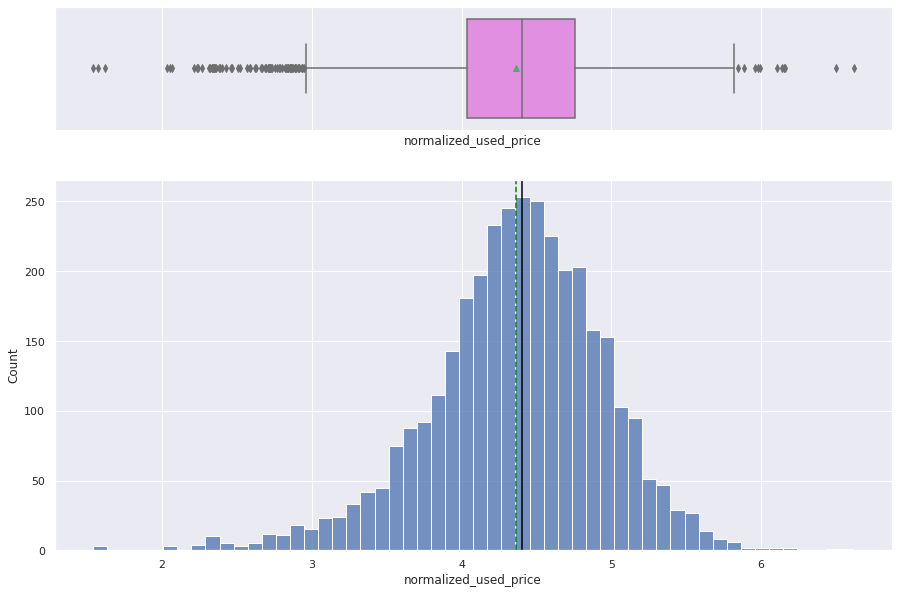

In [15]:
histogram_boxplot(df2, "normalized_used_price")

Observations:
* The mean is 4.364712.
* Outliers exist below 25% percentile and higher than 75% percentile.
* Median is between 4 and 4.5
* The distribution for normalized_used_price column is evenly distributed with a median betwwen 4 and 5

**`normalized_new_price`**

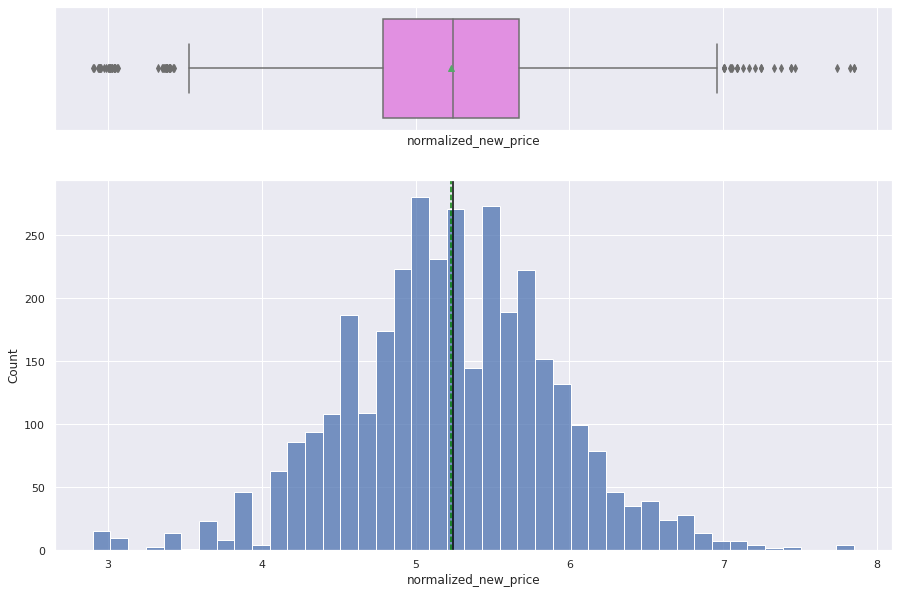

In [16]:
histogram_boxplot(df2, "normalized_new_price")

Observations:
* The mean is 5.233107.
* Outliers exist below 25% percentile and higher than 75% percentile.
* The distribution for normalized_new_price column is evenly distributed with a median  is between 5 and 5.5

**`screen_size`**

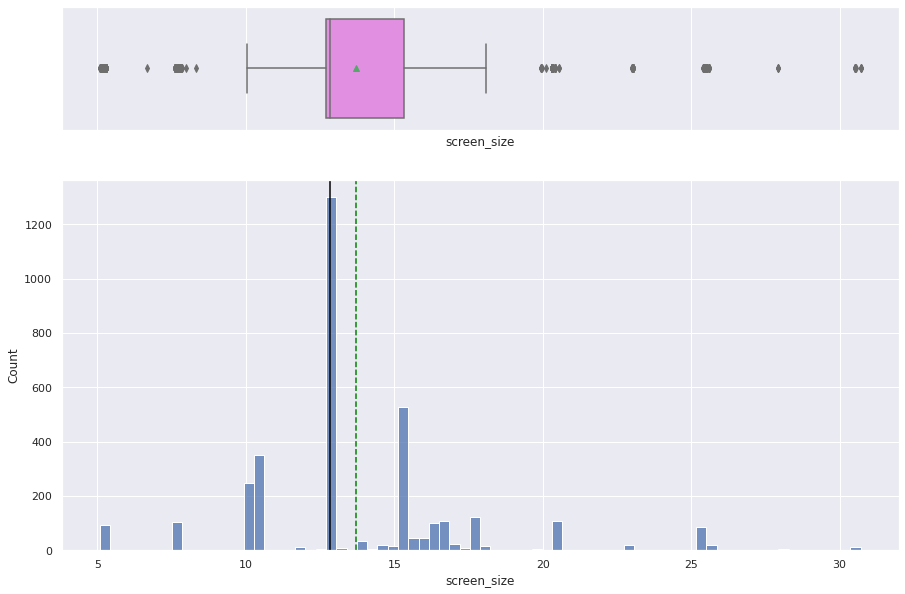

In [17]:
histogram_boxplot(df2, "screen_size")

Observations:
* The mean is 13.713115.
* Outliers exist below 25% percentile and higher than 75% percentile.
* Median is around 12.

**`main_camera_mp`**

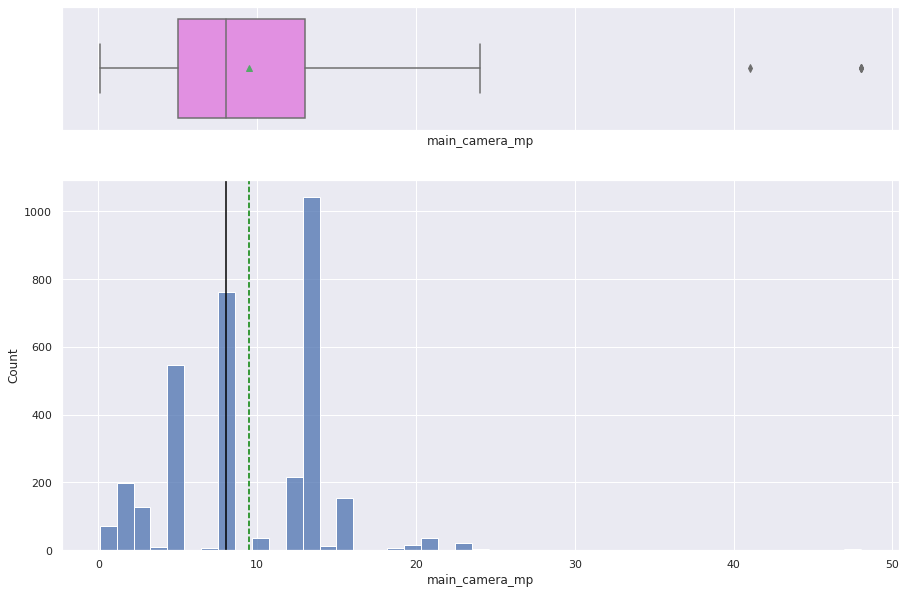

In [18]:
histogram_boxplot(df2, "main_camera_mp")

Observations:
* The mean is 6.554229.
* Outliers exist higher than 75% percentile.
* The distribution for main_camera_mp column is left-skewed with a median less than 10 MP.

**`selfie_camera_mp`**

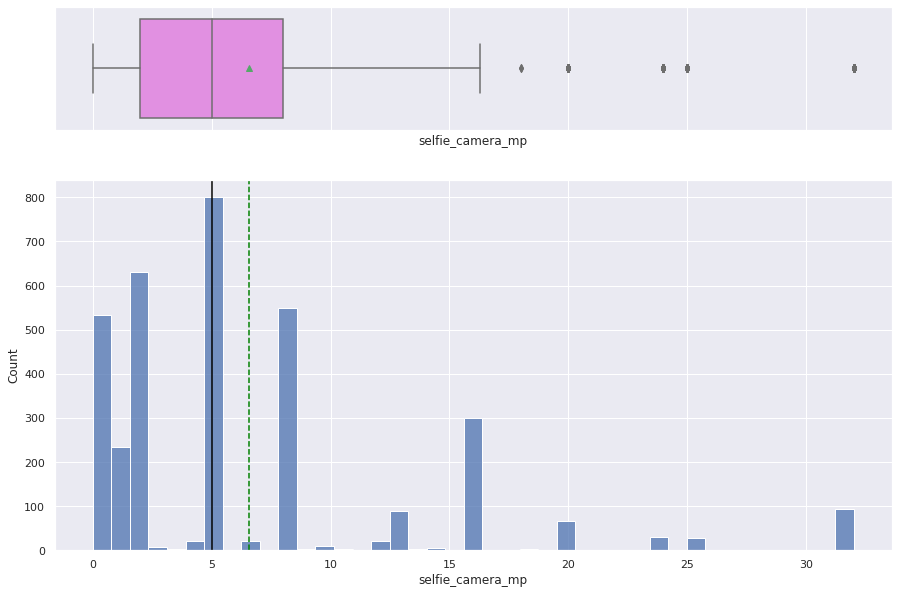

In [19]:
histogram_boxplot(df2, "selfie_camera_mp")

Observations:
* The mean is 6.554229.
* Outliers exist higher than 75% percentile.
* Median is 5.

**`int_memory`**

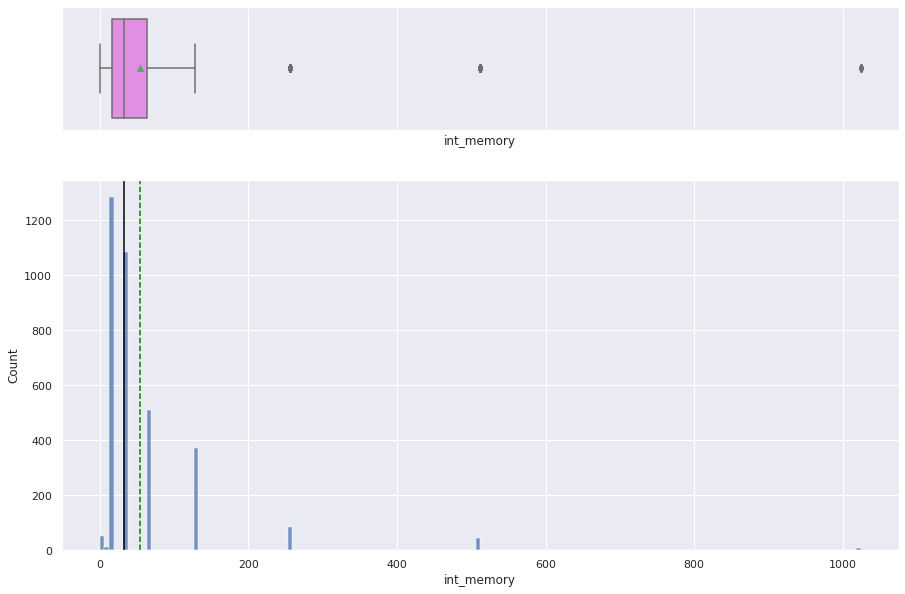

In [20]:
histogram_boxplot(df2, "int_memory")


Observations:
* The mean is 54.573099.
* Outliers exist higher than 75% percentile.
* Median is 32.
* The data is right skewed.

**`ram`**

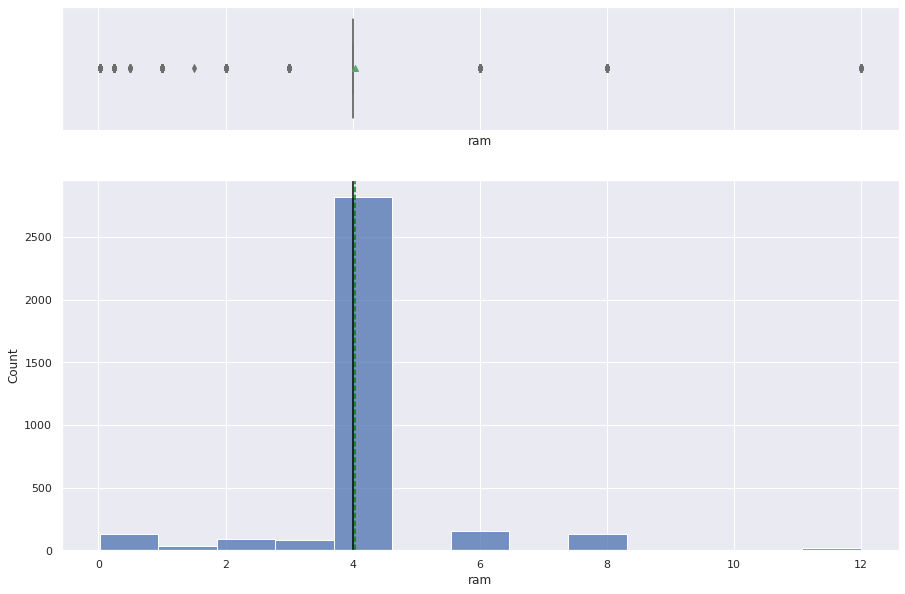

In [21]:
histogram_boxplot(df2, "ram")


Observations:
* The mean is 4.
* Outliers exist lower than 25% higher than 75% percentile.
* Median is 4.
* The data is right skewed.

**`weight`**

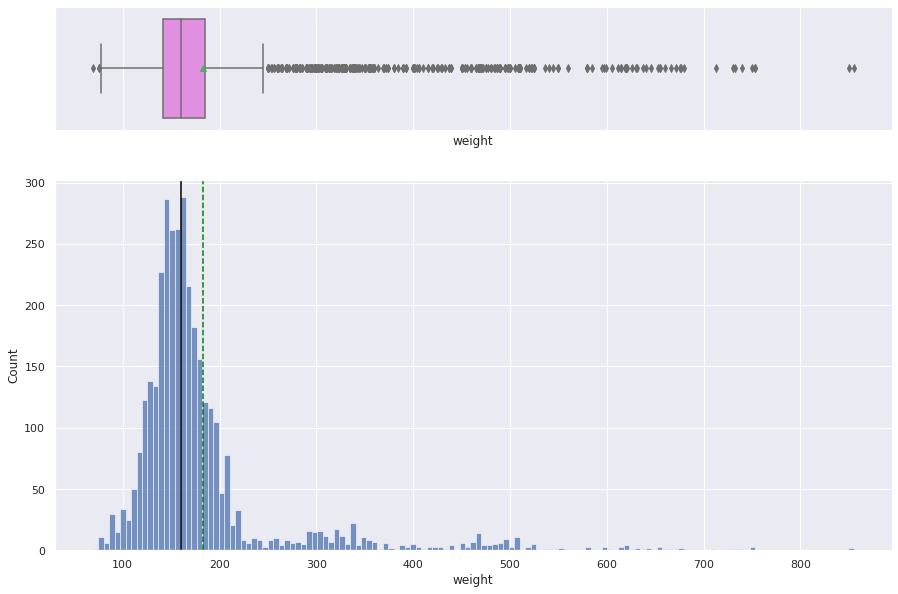

In [22]:
histogram_boxplot(df2, "weight")

Obsrvations:

- The mean is around 182.
-  The distribution for weight column is left-skewed distributed with a median around 160

**`battery`**

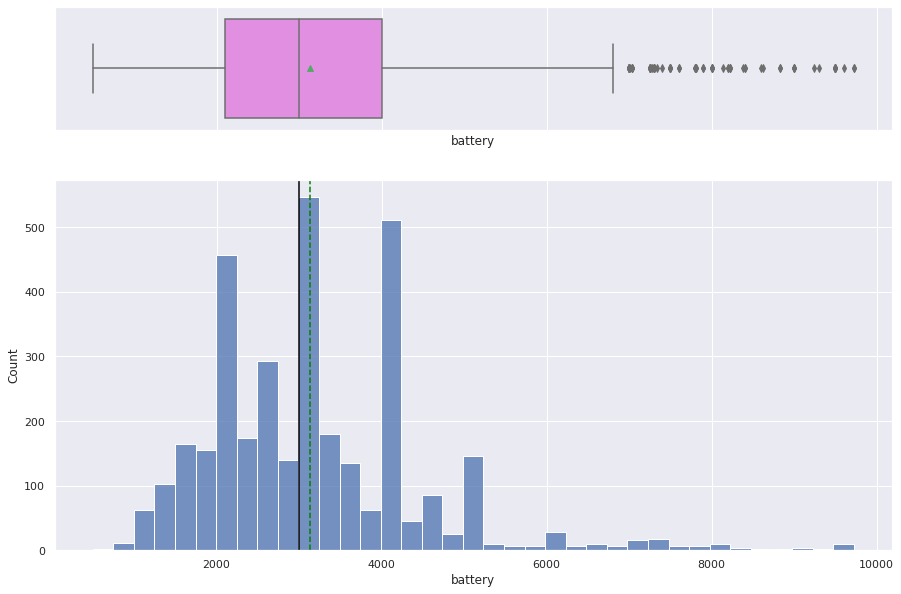

In [23]:
histogram_boxplot(df2, "battery")

Obsrvations:

- The mean is around 3133.402697.
- The median is around 3000.
- There are outliers exists above 75% interquartile range.
- The data is right skewed.

**`days_used`**

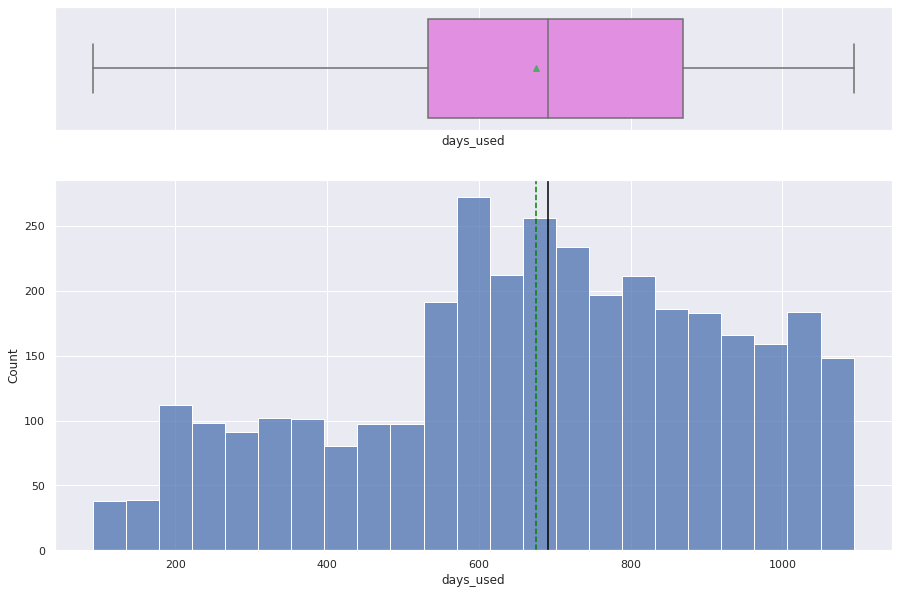

In [24]:
histogram_boxplot(df2, "days_used")

Obsrvations:

- The mean is around 674.
- The median is around 690.
- There are no outliers.

**`brand_name`**

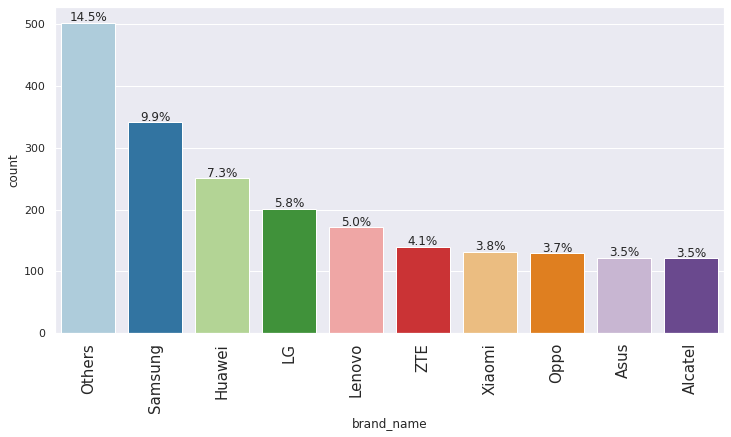

In [25]:
labeled_barplot(df2, "brand_name", perc=True, n=10)

Observations:
* Others classified as a brand name are at 500 and have higher percentage of 14.5.
* Asus and alcatel are the least.

**`os`**

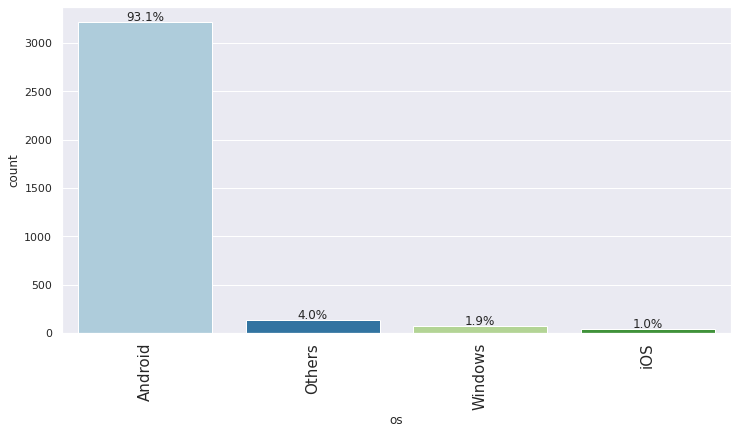

In [26]:
labeled_barplot(df2, "os", perc=True, n=10)

Observations:
* Android is the highest at 93.1%
* ios is the least.

**`4g`**

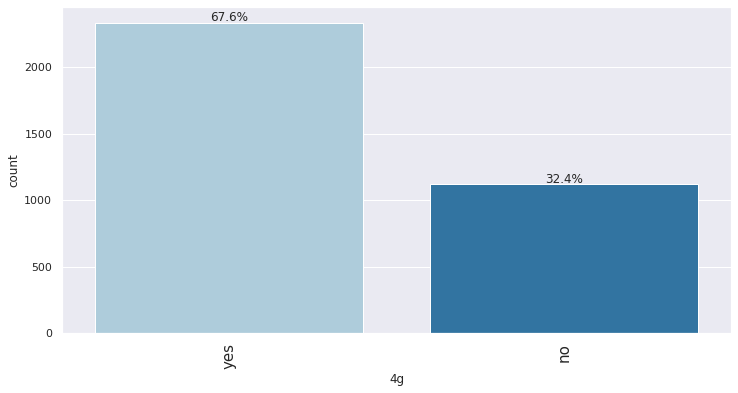

In [27]:
labeled_barplot(df2, "4g", perc=True, n=10)

Observations:
* 4G is used by 67.6%.

**`5g`**

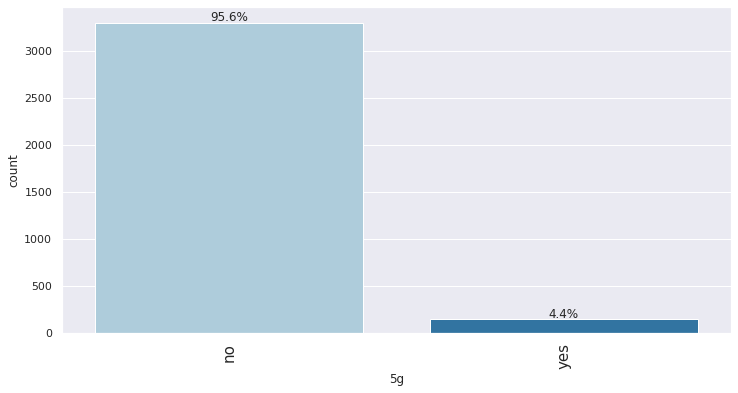

In [28]:
labeled_barplot(df2, "5g", perc=True, n=10)

Observations:
* 5G is used in 95.6%.

**`release_year`**

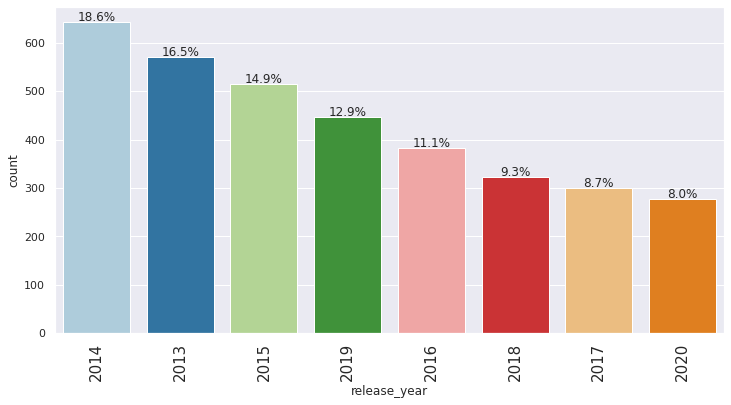

In [29]:
labeled_barplot(df2, "release_year", perc=True, n=10)

Observations:
* 18.6% of the phones are made in 2014 which is the highest.
* 2020 has the least number of phones made in that year.

### Bivariate Analysis

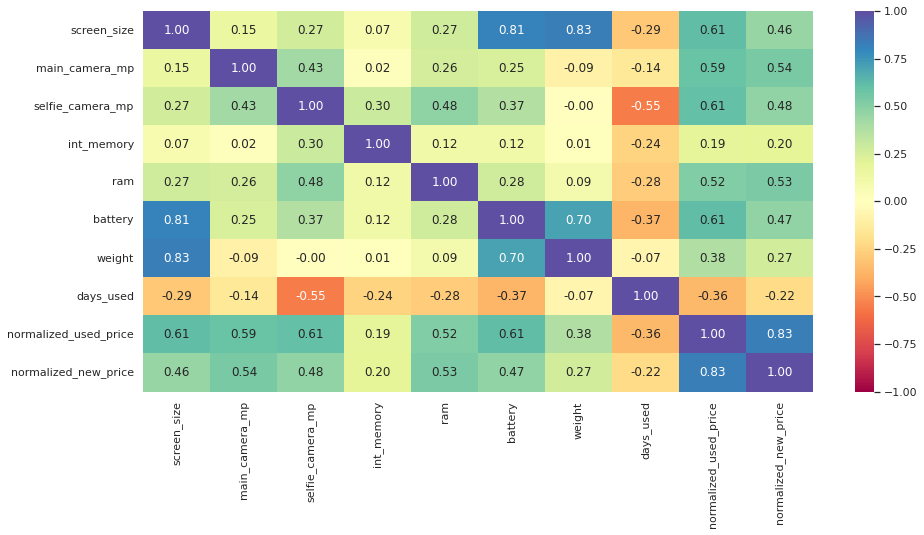

In [30]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:
- The battery ad weight has strong correlation with the screen size.
- The selfie camera has little correlation with the number of days used.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

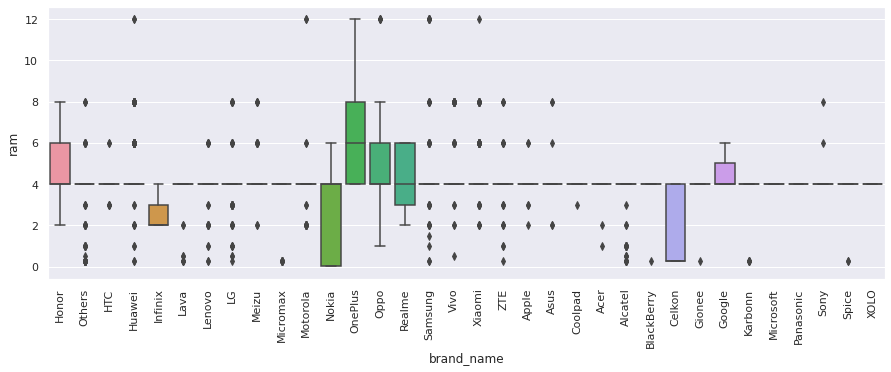

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observations:
- Oneplus has the highest ram compared to the rest.
- The median ram for Nokia is the least followed by Celkon.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [32]:
df2_large_battery = df2[df2.battery > 4500]
df2_large_battery.shape

(341, 15)

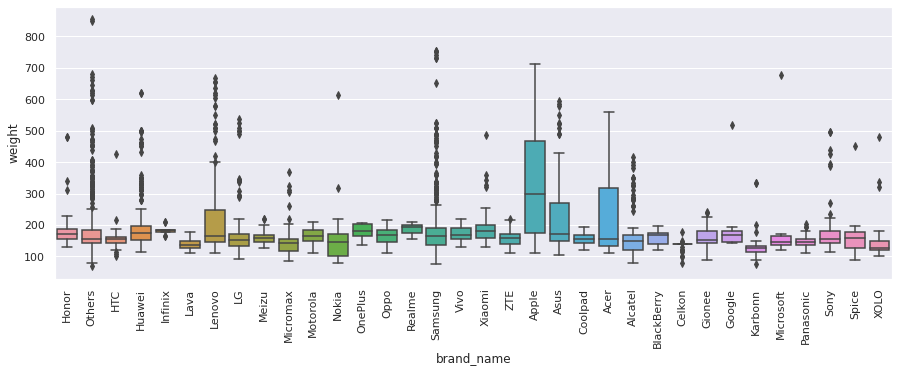

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [34]:
df2_large_screen = df2[df2.screen_size > 6 * 2.54]
df2_large_screen.shape

(1099, 15)

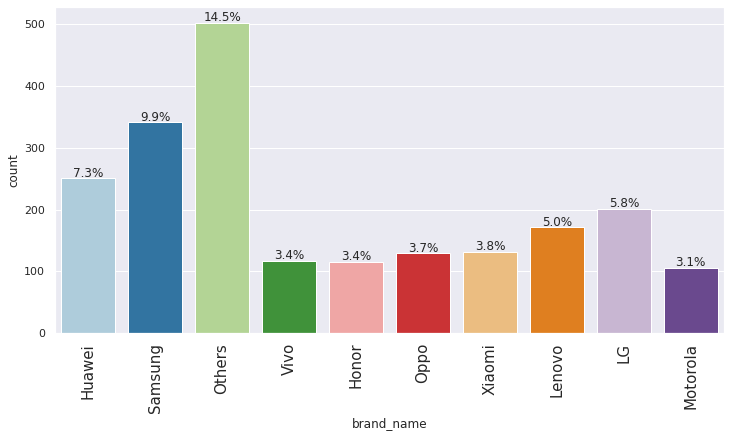

In [35]:
labeled_barplot(df2_large_screen, "brand_name", perc=True, n=10)

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [36]:
df2_selfie_camera = df2[df2.selfie_camera_mp > 8]
df2_selfie_camera.shape

(655, 15)

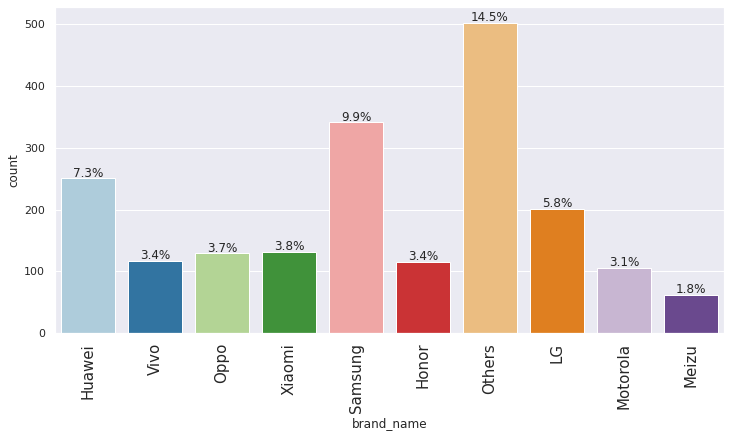

In [37]:
labeled_barplot(df2_selfie_camera, "brand_name", perc=True, n=10)

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [38]:
df2_main_camera = df2[df2.main_camera_mp > 16]
df2_main_camera.shape

(94, 15)

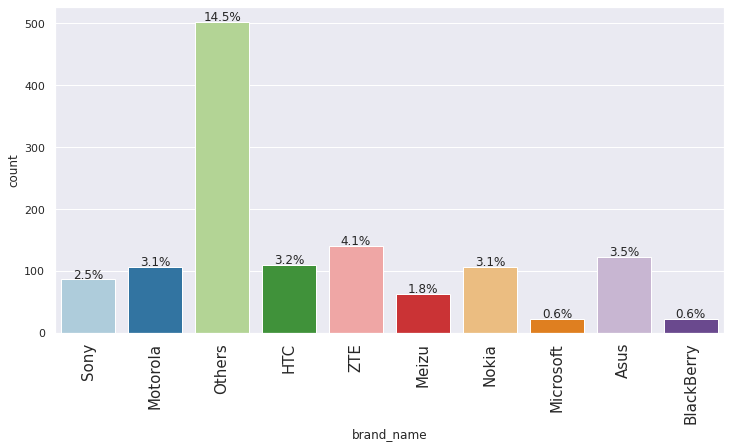

In [39]:
labeled_barplot(df2_main_camera, "brand_name", perc=True, n=10)

**Let's see how the price of used devices varies across the years.**

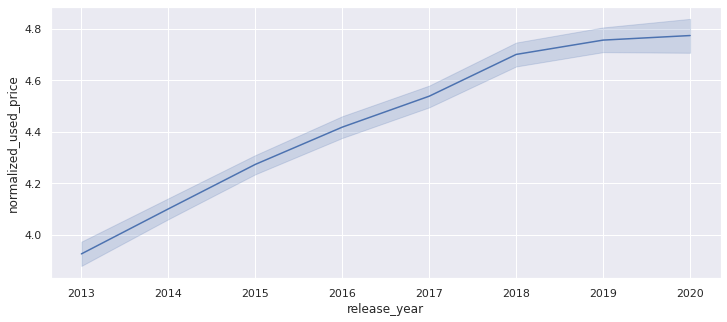

In [40]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df2, x="release_year", y="normalized_used_price") ## Complete the code to create a lineplot for release year and used price
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

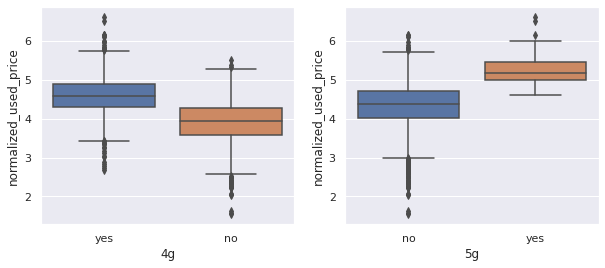

In [41]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df2, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df2, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [42]:
# let's create a copy of the data
df3 = df2.copy()

In [43]:
# checking for missing values
df3.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
                        ..
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
Length: 15, dtype: int64

In [44]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

for col in cols_impute:
    df3[col] = df3[col].fillna(value=df3.groupby(['release_year','brand_name'])[col].transform("median"))

# checking for missing values
df3.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
                        ..
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
Length: 15, dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [45]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df3[col] = df3[col].fillna(
        value=df3.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df3.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
                        ..
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
Length: 15, dtype: int64

In [46]:
df3["main_camera_mp"] = df3["main_camera_mp"].fillna(df3["main_camera_mp"].median()) ## Complete the code to impute the data with median
# checking for missing values
df3.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
                        ..
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
Length: 15, dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [47]:
df3["years_since_release"] = 2022 - df3["release_year"]
df3.drop("release_year", axis=1, inplace=True)
df3["years_since_release"].describe()

count    3454.000000
mean        6.034742
std         2.298455
min         2.000000
25%         4.000000
50%         6.500000
75%         8.000000
max         9.000000
Name: years_since_release, dtype: float64

### Outlier Check



- Let's check for outliers in the data.

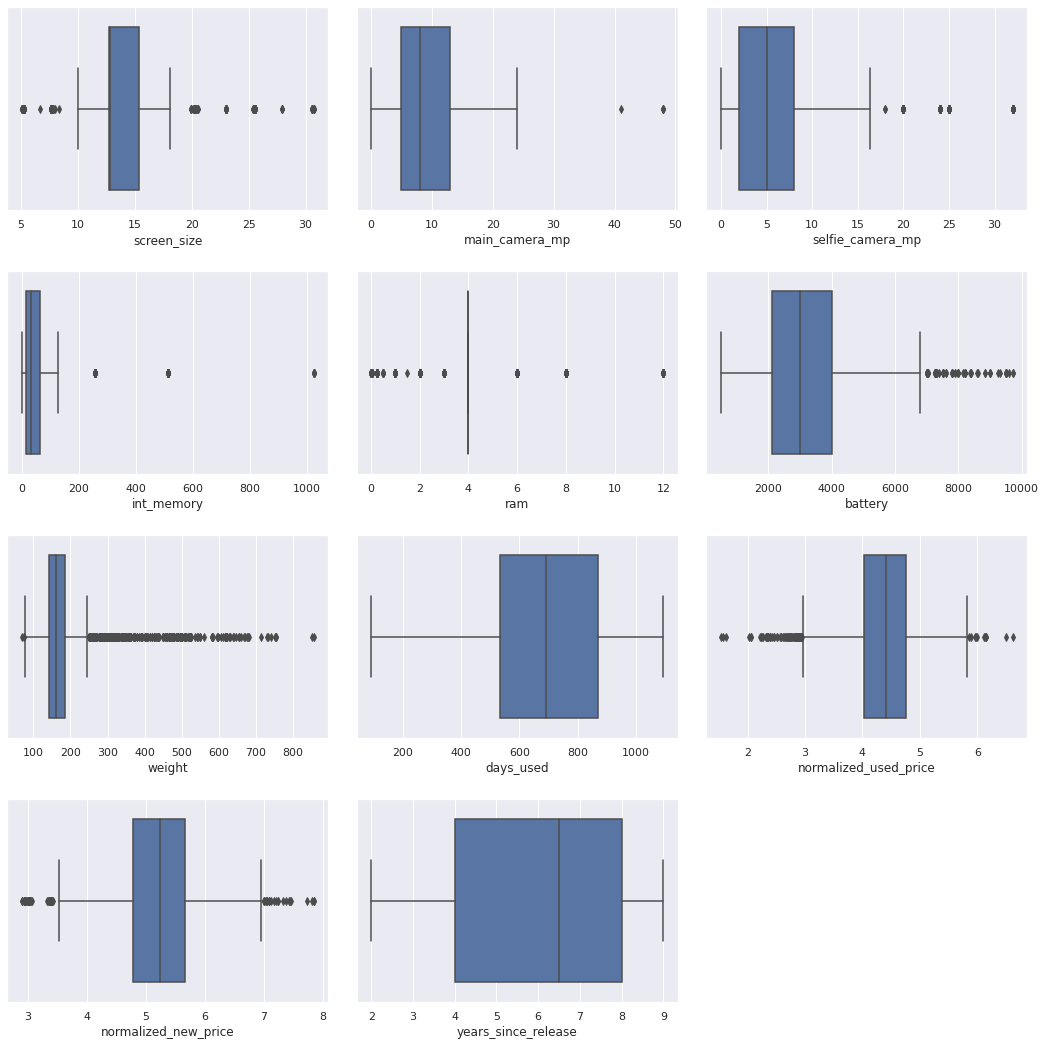

In [48]:
# outlier detection using boxplot
num_cols = df3.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df3, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are outliers in the data

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [49]:
## Complete the code to define the dependent and independent variables
X = df3.drop(['normalized_used_price'],axis = 1)
y = df3['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    2  
1              5.519018                    2  
2              5.884631                    2  
3              5.6

In [50]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1) ## Complete the code to split the data into train and test in specified ratio

In [53]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [54]:
olsmodel1 = sm.OLS(y_train,x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                           20:47:36   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Interpreting the Regression Results:

1.Adjusted. R-squared: It reflects the fit of the model.
-Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
-In our case, the value for adj. R-squared is 0.845, which is good.

2.const coefficient: It is the Y-intercept.
-It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
-In our case, the value for const coefficient is 1.3393

3.Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
-In our case, the coefficient of duration is 0.0123.



## Model Performance Check

Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and R2.
We will define a function to calculate MAPE and adjusted R2.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

In [55]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [57]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.842, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the anime ratings

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

We will test for multicollinearity using VIF.

General Rule of thumb:

If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.
If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [58]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [59]:
checking_vif(x_train)



,feature,VIF
0,const,233.235691
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
...,...,...
44,os_Others,1.859863
45,os_Windows,1.596034
46,os_iOS,11.784684
47,4g_yes,2.467681


*There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
*We will systematically drop numerical columns with VIF > 5
*We will ignore the VIF values for dummy variables and the constant (intercept)

Removing Multicollinearity (if needed)

To remove multicollinearity

In [60]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [61]:
col_list = ['screen_size','weight'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [62]:
col_to_drop = 'screen_size' ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,206.340974
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
...,...,...
43,os_Others,1.625212
44,os_Windows,1.595936
45,os_iOS,11.678957
46,4g_yes,2.466915


We have dealt with multicollinearity in the data

Let's rebuild the model using the updated set of predictors variables

In [63]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                           20:47:38   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations

We can see that adj. R-squared has dropped from 0.845 to 0.842, which shows that the dropped columns did not have much effect on the model
As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

###Dropping high p-value variables (if needed)

In [64]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [65]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [66]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                           20:47:38   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [67]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [68]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


Observations

* No feature in the model has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with

* adjusted R-squared is 0.838, i.e., our model is able to explain ~83% of the variance

*The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.838

*This shows that the variables we dropped were not affecting the model
RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting



TEST FOR LINEARITY AND INDEPENDENCE

In [69]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


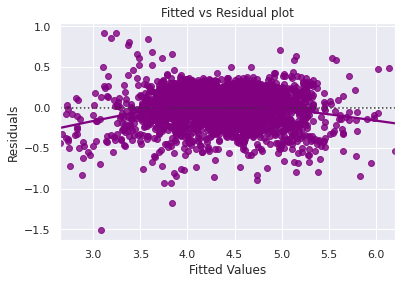

In [70]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

TEST FOR NORMALITY

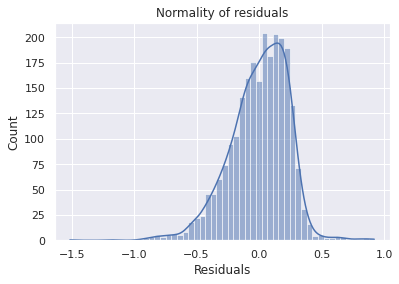

In [71]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram of residuals does have a bell shape.
Let's check the Q-Q plot.

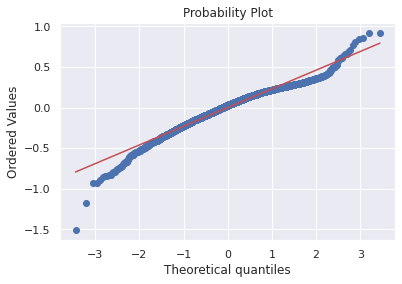

In [72]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.
Let's check the results of the Shapiro-Wilk test.

In [73]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
Strictly speaking, the residuals are not normal.

The distribution as close to being normal.

So, the assumption is satisfied.

##TEST FOR HOMOSCEDASTICITY

In [74]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

##Predictions on test data

In [75]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [76]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [77]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                           20:47:40   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


The model is able to explain ~80% of the variation in the data

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

The MAPE on the test set suggests we can predict within 4.6% of the anime ratings

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

1. The model is able to explain ~80% of the variation in the data and within 4.55% of the refurbished phones on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


2. If the weight of a used phone increases by one unit, then its price increases by 0.0017 units, all other variables held constant


3. If the number of years from when the phone was released increases by one unit, then its price decreases by 0.0292 units, all other variables held constant



4. The main camera increases by one unit the price increases by 0.0210 unit


5. A used 4g phone can be resold at a higher price than a refurbished 5g phone.


___